<a href="https://colab.research.google.com/github/ss-812/VRP/blob/main/VRP_Gen_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install matplotlib deap

In [107]:
#Required Libraries
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [108]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

In [109]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [110]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [111]:
# Fitness Function
def evalVRP(individual):
    tot_dist = 0
    dist = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        tot_dist += vehicle_distance
        dist.append(vehicle_distance)
    stddev = np.std(dist)  # std dev to penalise higher imbalance between distances
    return tot_dist, stddev
toolbox.register("evaluate", evalVRP)

In [112]:
# Genetic Operators
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.15)
toolbox.register("select", tools.selTournament, tournsize=5)

In [113]:
# Plotting the routes
def plot_routes(individual, title="Routes"):
    for (x,y) in locations:
      plt.plot(x,y,'bo')
    plt.plot(depot[0],depot[1],'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	352.305	2.29136
1  	227   	337.983	2.63654
2  	242   	329.331	0.293429
3  	238   	326.336	0.293429
4  	222   	318.024	0.293429
5  	212   	306.802	0.293429
6  	233   	292.237	2.8453  
7  	235   	281.443	4.66928 
8  	236   	274.798	4.39484 
9  	229   	259.902	3.97347 
10 	229   	248.853	3.6726  
11 	227   	242.493	13.8167 
12 	234   	241.881	13.4534 
13 	213   	246.539	7.78859 
14 	216   	247.922	7.99437 
15 	228   	262.077	5.17382 
16 	246   	255.687	6.81904 
17 	230   	237.501	5.17382 
18 	234   	236.947	11.018  
19 	232   	243.313	4.44014 
20 	232   	238.671	15.0826 
21 	213   	239.961	2.27376 
22 	225   	239.379	3.78197 
23 	218   	237.933	9.97501 
24 	242   	237.466	1.06213 
25 	239   	236.738	3.59364 
26 	234   	240.64 	7.56706 
27 	235   	239.454	3.78197 
28 	241   	238.262	4.33268 
29 	226   	234.993	3.23477 
30 	233   	236.893	6.43174 
31 	228   	234.63 	3.54922 
32 	232   	237.056	6.08469 
33 	230   	238.272	11.0351 
34 	216   	238.987	4.24

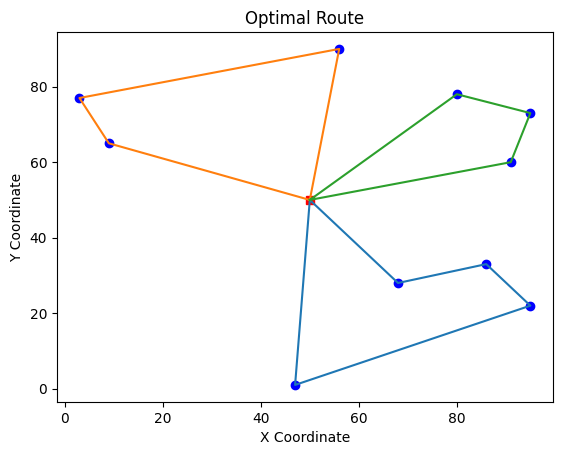

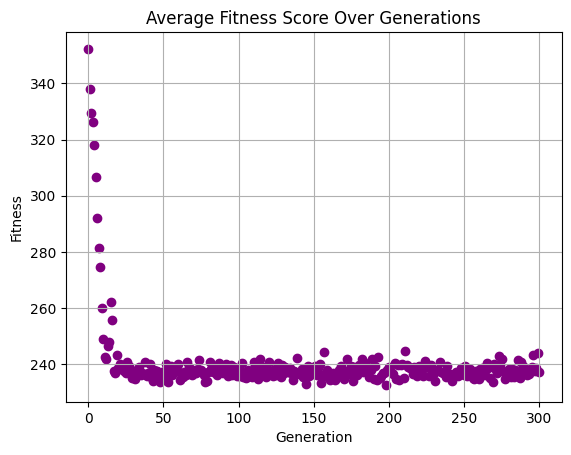

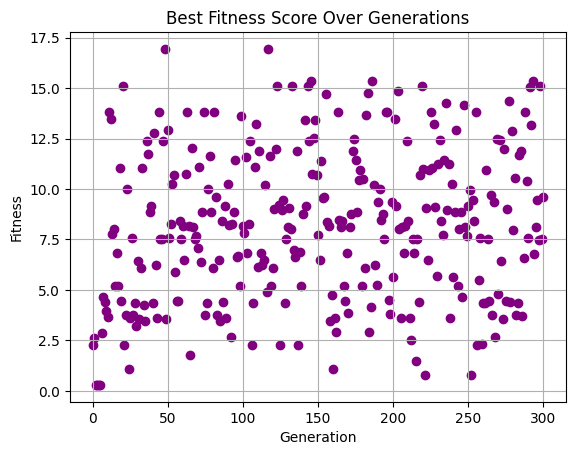

In [114]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof, verbose=True)
    plot_routes(hof[0], "Optimal Route")

    gens = logbook.select("gen")
    avg_fitness = logbook.select("avg")
    min_fitness = logbook.select("min")

    plt.scatter(gens, avg_fitness, label="Average Fitness", color="purple", marker="o" )
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Average Fitness Score Over Generations")
    plt.grid(True)
    plt.show()

    plt.scatter(gens, min_fitness, label="Best Fitness", color="purple", marker= "o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Best Fitness Score Over Generations")
    plt.grid(True)
    plt.show()
    return pop, stats, hof

if __name__ == "__main__":
    main()